In [19]:
import pandas as pd
import numpy as np
# import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [7]:
sales = pd.read_csv("nyc_building_sales.csv")

/Users/Honors/anaconda/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2902: DtypeWarning:

Columns (23,26,28,29,70,71,86) have mixed types. Specify dtype option on import or set low_memory=False.



In [8]:
pd.set_option("max_columns", 500)

## Plotly offline

When I first tried out `plotly` several months ago I lost interest when I found that I was API rate limited to 20 request per day, but now that `plotly` has an offline API that seems worth a look.

The following set of imports and commands get everything local:

In [2]:
import plotly.offline
import plotly.tools
plotly.offline.init_notebook_mode(connected=True)

Whenceforth you *should* be able to plot inline in offline mode.

Note the difference between `plot` and `iplot`:

* `iplot`: Inline, in-notebook plotting.
* `plot`: Saves to a seperate file.

In [5]:
plotly.offline.iplot([{"x": [1, 2, 3], "y": [3, 1, 6]}])

I'm not interesting in learning the intricacies of the `plotly` API, but if I can get wins with converting static plots into `plotly` ones that'd be useful.

## Base plotly conversions

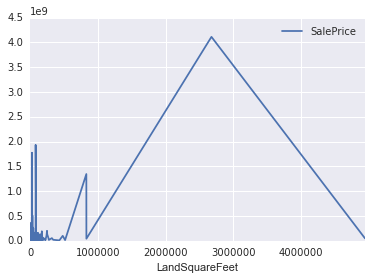

In [20]:
sales[['LandSquareFeet', 'SalePrice']].sort_values(by='LandSquareFeet').plot(x='LandSquareFeet', y='SalePrice')

In [21]:
f, ax = plt.subplots(figsize=(6, 3))
sales[['LandSquareFeet', 'SalePrice']].sort_values(by='LandSquareFeet').plot(x='LandSquareFeet', y='SalePrice', ax=ax)
plotly.offline.iplot(plotly.tools.mpl_to_plotly(f))

/Users/Honors/anaconda/lib/python3.5/site-packages/plotly/matplotlylib/renderer.py:516: UserWarning:

Looks like the annotation(s) you are trying 
to draw lies/lay outside the given figure size.

Therefore, the resulting Plotly figure may not be 
large enough to view the full text. To adjust 
the size of the figure, use the 'width' and 
'height' keys in the Layout object. Alternatively,
use the Margin object to adjust the figure's margins.

/Users/Honors/anaconda/lib/python3.5/site-packages/plotly/matplotlylib/renderer.py:384: UserWarning:

Bummer! Plotly can currently only draw Line2D objects from matplotlib that are in 'data' coordinates!

/Users/Honors/anaconda/lib/python3.5/site-packages/plotly/matplotlylib/renderer.py:481: UserWarning:

I found a path object that I don't think is part of a bar chart. Ignoring.



`plotly` requires additionally managing the `figure` and `ax` environments, however this is ok&mdash;chart stacking in `seaborn` also requires it, as do tons of other things. Let's just see how many things it can handle...

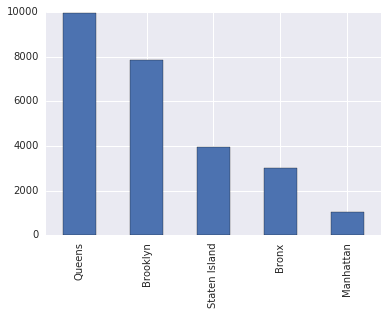

In [22]:
sales['Borough'].value_counts().plot.bar()

In [23]:
f, ax = plt.subplots(figsize=(6, 3))
sales['Borough'].value_counts().plot.bar(ax=ax)
plotly.offline.iplot(plotly.tools.mpl_to_plotly(f))

Loses the labels, oddly enough.

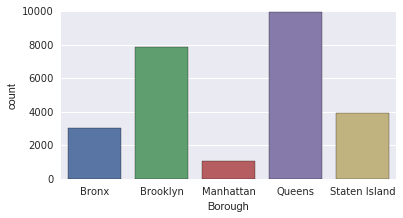

In [25]:
f, ax = plt.subplots(figsize=(6, 3))
sns.countplot(x='Borough', data=sales, ax=ax)

In [26]:
f, ax = plt.subplots(figsize=(6, 3))
sns.countplot(x='Borough', data=sales, ax=ax)
plotly.offline.iplot(plotly.tools.mpl_to_plotly(f))

/Users/Honors/anaconda/lib/python3.5/site-packages/plotly/matplotlylib/renderer.py:516: UserWarning:

Looks like the annotation(s) you are trying 
to draw lies/lay outside the given figure size.

Therefore, the resulting Plotly figure may not be 
large enough to view the full text. To adjust 
the size of the figure, use the 'width' and 
'height' keys in the Layout object. Alternatively,
use the Margin object to adjust the figure's margins.



So what's the problem here? `plotly` is trying to serialize `matplotlib` objects, which seem just not to subject to such treatment easily. So what parts of the plot you will retain on conversion, depends.

Neither `pandas` nor `seaborn` is not specifically targeted for conversion, so I don't expect `plotly` performance with it to be great. I imagine it would very good with pure `matplotlib` objects (though heck, I don't know), less so with bakes from build-ons. But let's try the build-ons first.

In [27]:
owner_dummy = sales[sales['SalePrice'] < 1*10**9].copy()
owner_dummy['P/NP'] = (owner_dummy['OwnerType'] == 'P').replace(True, "P").replace(False, "NP")

In [28]:
f, ax = plt.subplots(figsize=(6, 3))
pd.crosstab(owner_dummy['Borough'], owner_dummy['P/NP']).plot.bar(ax=ax)
plotly.offline.iplot(plotly.tools.mpl_to_plotly(f))

/Users/Honors/anaconda/lib/python3.5/site-packages/plotly/matplotlylib/renderer.py:516: UserWarning:

Looks like the annotation(s) you are trying 
to draw lies/lay outside the given figure size.

Therefore, the resulting Plotly figure may not be 
large enough to view the full text. To adjust 
the size of the figure, use the 'width' and 
'height' keys in the Layout object. Alternatively,
use the Margin object to adjust the figure's margins.

/Users/Honors/anaconda/lib/python3.5/site-packages/plotly/matplotlylib/renderer.py:481: UserWarning:

I found a path object that I don't think is part of a bar chart. Ignoring.



Hmm.

In [31]:
f, ax = plt.subplots(figsize=(12, 6))
sns.barplot(data=owner_dummy, x='Borough', y='SalePrice', estimator=np.median, ax=ax)
plotly.offline.iplot(plotly.tools.mpl_to_plotly(f))

In [35]:
small_owner_dummy = owner_dummy[owner_dummy['SalePrice'] < 1*10**6]

In [33]:
f, ax = plt.subplots(figsize=(12, 6))
owner_dummy[owner_dummy['SalePrice'] < 1*10**6][['SalePrice']].plot.hist(bins=20, ax=ax)
plotly.offline.iplot(plotly.tools.mpl_to_plotly(f))

/Users/Honors/anaconda/lib/python3.5/site-packages/plotly/matplotlylib/renderer.py:481: UserWarning:

I found a path object that I don't think is part of a bar chart. Ignoring.



Not bad!

In [36]:
f, ax = plt.subplots(figsize=(12, 6))
sns.distplot(small_owner_dummy[['SalePrice']], bins=20, ax=ax)
plotly.offline.iplot(plotly.tools.mpl_to_plotly(f))

/Users/Honors/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning:

using a non-integer number instead of an integer will result in an error in the future



Some weirdness in these numbers.

In [37]:
d = small_owner_dummy[['SalePrice', 'Borough']].set_index([small_owner_dummy.index, 'Borough']).unstack('Borough')
d.columns = d.columns.get_level_values(1)
f, ax = plt.subplots(figsize=(12, 6))
d.plot.box(ax=ax)
plotly.offline.iplot(plotly.tools.mpl_to_plotly(f))

Again it reproduces the values nicely but seems to consider things as individual lines and things. Which is not super-helpful. Wonder if the `_nolegend_` et. al. can be turned off.

In [38]:
f, ax = plt.subplots(figsize=(12, 6))
sns.violinplot(data=small_owner_dummy,
            x='Borough',
            y='SalePrice')
plotly.offline.iplot(plotly.tools.mpl_to_plotly(f))

/Users/Honors/anaconda/lib/python3.5/site-packages/plotly/matplotlylib/renderer.py:445: UserWarning:

Dang! That path collection is out of this world. I totally don't know what to do with it yet! Plotly can only import path collections linked to 'data' coordinates



> Dang! That path collection is out of this world. I totally don't know what to do with it yet! Plotly can only import path collections linked to 'data' coordinates

Lmao.

In [40]:
f, ax = plt.subplots(figsize=(12, 6))
sales[sales['YearBuilt'] > 1980].groupby(['Borough', 'YearBuilt']).count()['Index'].unstack('Borough').plot.area(fontsize=15, ax=ax)
plotly.offline.iplot(plotly.tools.mpl_to_plotly(f))

/Users/Honors/anaconda/lib/python3.5/site-packages/plotly/matplotlylib/renderer.py:445: UserWarning:

Dang! That path collection is out of this world. I totally don't know what to do with it yet! Plotly can only import path collections linked to 'data' coordinates

/Users/Honors/anaconda/lib/python3.5/site-packages/plotly/matplotlylib/renderer.py:481: UserWarning:

I found a path object that I don't think is part of a bar chart. Ignoring.



Dang! That's actually really nice! The line chart examples baked-in by Plotly have the lines linked by year, but this is pretty good for a static conversion, it just doesn't know how to populate the legend.

In [45]:
f, ax = plt.subplots(figsize=(6, 6))
sales.groupby('Borough').count()['Index'].plot.pie(ax=ax)
plotly.offline.iplot(plotly.tools.mpl_to_plotly(f))

/Users/Honors/anaconda/lib/python3.5/site-packages/plotly/matplotlylib/renderer.py:481: UserWarning:

I found a path object that I don't think is part of a bar chart. Ignoring.



PlotlyEmptyDataError: Empty data list found. Make sure that you populated the list of data objects you're sending and try again.
Questions? support@plot.ly

Sad face. So, very hit-and-miss.

In [51]:
f, ax = plt.subplots()
pd.tools.plotting.parallel_coordinates(sales[['BldgArea', 'AssessmentValueSqFt',
                                              'EstCurentMarketValueSqFt',
                                              'MarketValueSqFt',
                                              'Borough']].sample(10),
                                       'Borough')
plotly.offline.iplot(plotly.tools.mpl_to_plotly(f))

/Users/Honors/anaconda/lib/python3.5/site-packages/plotly/matplotlylib/mplexporter/exporter.py:82: UserWarning:

Blended transforms not yet supported. Zoom behavior may not work as expected.

/Users/Honors/anaconda/lib/python3.5/site-packages/plotly/matplotlylib/renderer.py:384: UserWarning:

Bummer! Plotly can currently only draw Line2D objects from matplotlib that are in 'data' coordinates!



RuntimeError: Cannot get window extent w/o renderer

In [47]:
f, ax = plt.subplots(figsize=(12, 12))
pd.tools.plotting.radviz(sales[['BldgArea',
                                'AssessmentValueSqFt', 
                                'EstCurentMarketValueSqFt',
                                'MarketValueSqFt',
                                'Borough']].sample(1000),
                         'Borough', ax=ax)
plotly.offline.iplot(plotly.tools.mpl_to_plotly(f))

/Users/Honors/anaconda/lib/python3.5/site-packages/plotly/matplotlylib/renderer.py:481: UserWarning:

I found a path object that I don't think is part of a bar chart. Ignoring.



RuntimeError: Cannot get window extent w/o renderer

Well, the principle is verified, but `plotly` really won't deal with `pandas` or `seaborn` plotting (thpugh the line graph is very usable).

So next:

1. Try `plotly + matplotlib`
2. Try `plotly + cufflinks + pandas`